In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from imutils import paths
import os

In [0]:
from PIL import Image

In [0]:
import numpy as np
np.random.seed(42)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
tf.set_random_seed(42)

In [0]:
imgfiles = paths.list_images("/content/drive/My Drive/fingerprint_alteration/image_files/")
#print(imgfiles)

In [0]:
import glob

In [0]:
imgfiles1 = glob.glob("/content/drive/My Drive/fingerprint_alteration/image_files/*.PGM")
#print(imgfiles1)

In [0]:
X = []
y = []

In [0]:
for fname in imgfiles1:
    X_i = Image.open(fname)
    #print(fname)
    X_i = np.array(X_i.resize((64,64)))/ 255.0
    elist = fname.split(os.path.sep)
    #print(elist[:10])
    X.append(X_i)
    label = elist[6].split("_")
    #print(label)
    label2 = label[6].split(".")
    #print(label2)
    y.append(label2[0])
    #print(y)
    

In [13]:
print(set(y))

{'Obl', 'CR', 'Zcut', 'REAL'}


In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
lencoder = LabelEncoder()
y = lencoder.fit_transform(y)

In [16]:
print(set(y))

{0, 1, 2, 3}


In [17]:
print(lencoder.classes_)

['CR' 'Obl' 'REAL' 'Zcut']


In [18]:
print(lencoder.inverse_transform([0]))

['CR']


In [19]:
X = np.array(X)
y = np.array(y)
print(len(X))
print(len(y))

3976
3976


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify = y,random_state = 42)

In [22]:
print("X_train_shape:{}".format(X_train.shape))

X_train_shape:(3180, 64, 64)


In [23]:
print("X_test_shape:{}".format(X_test.shape))

X_test_shape:(796, 64, 64)


In [0]:
X_train = X_train[...,np.newaxis]

In [0]:
X_test = X_test[...,np.newaxis]

In [0]:
model_CNN = keras.models.Sequential()

In [27]:
model_CNN.add(keras.layers.Conv2D(filters=32,kernel_size = 7,padding = 'same',activation = 'relu',input_shape = [64,64,1]))
model_CNN.add(keras.layers.MaxPooling2D(pool_size = 2))
model_CNN.add(keras.layers.Conv2D(filters=64,kernel_size = 5,padding = 'same',activation = 'relu'))
model_CNN.add(keras.layers.MaxPooling2D(pool_size = 2))
model_CNN.add(keras.layers.Conv2D(filters=64,kernel_size = 3,padding = 'same',activation = 'relu'))
model_CNN.add(keras.layers.MaxPooling2D(pool_size = 2))

W0817 09:05:52.750438 140430622680960 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [28]:
model_CNN.add(keras.layers.Flatten())
model_CNN.add(keras.layers.Dense(64,activation = 'relu'))
model_CNN.add(keras.layers.Dense(32,activation = 'relu'))
model_CNN.add(keras.layers.Dense(4,activation = 'softmax'))
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        1600      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [0]:
model_CNN.compile(loss="sparse_categorical_crossentropy",optimizer = 'adam',metrics = ["accuracy"])

In [0]:
callbacks = [keras.callbacks.EarlyStopping(patience = 5),keras.callbacks.ModelCheckpoint("/content/drive/My Drive/soco_model.h5",save_best_only = True)]

In [31]:
history_CNN = model_CNN.fit(X_train,y_train,epochs = 20,validation_split=0.1,callbacks = callbacks)

Train on 2862 samples, validate on 318 samples
Epoch 1/20
2862/2862 [==============================] - 3s 1ms/sample - loss: 1.3869 - acc: 0.2673 - val_loss: 1.3660 - val_acc: 0.3113
Epoch 2/20
2862/2862 [==============================] - 1s 266us/sample - loss: 1.3283 - acc: 0.3550 - val_loss: 1.2411 - val_acc: 0.3805
Epoch 3/20
2862/2862 [==============================] - 1s 264us/sample - loss: 1.2383 - acc: 0.4008 - val_loss: 1.2015 - val_acc: 0.4025
Epoch 4/20
2862/2862 [==============================] - 1s 264us/sample - loss: 1.1574 - acc: 0.4210 - val_loss: 1.1357 - val_acc: 0.4119
Epoch 5/20
2862/2862 [==============================] - 1s 265us/sample - loss: 1.0834 - acc: 0.4518 - val_loss: 1.0647 - val_acc: 0.4245
Epoch 6/20
2862/2862 [==============================] - 1s 272us/sample - loss: 1.0336 - acc: 0.4860 - val_loss: 1.0393 - val_acc: 0.4528
Epoch 7/20
2862/2862 [==============================] - 1s 265us/sample - loss: 0.9661 - acc: 0.5199 - val_loss: 0.9732 - val_a

In [0]:
import pandas as pd

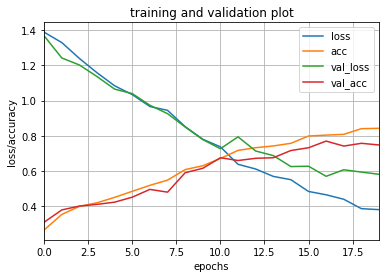

In [33]:
pd.DataFrame(history_CNN.history).plot()
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("training and validation plot")
plt.show()

In [34]:
best_model = keras.models.load_model('/content/drive/My Drive/soco_model.h5')

W0817 09:06:11.931695 140430622680960 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0817 09:06:11.933090 140430622680960 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [35]:
test_loss,test_accuracy = model_CNN.evaluate(X_test,y_test)

796/796 [==============================] - 0s 144us/sample - loss: 0.6223 - acc: 0.7337


In [36]:
print("test_loss {}","test_accuracy {}",(test_loss,test_accuracy))

test_loss {} test_accuracy {} (0.6222876552960381, 0.7336683)
